# Begin vroeg
Waarom het belangrijk is om vroeg te beginnen met je persoonlijke financiën. We gaan dieper in op salarisverhoging en waarom het begin zo moeilijk is.

### Hoofdvraag
Wat voor invloed heeft starttijd op het totale vermogen tot het pensioen?

## 6.1 Sparen vs Beleggen
Aannames
- startsalaris: 25.000
- spaarpercentage: 15%
- rendement op investeringen: 5%
- max jaren: 20 (kunnen we ons makkelijker voorstellen, voor de meeste lezer ongeveer hun leeftijd)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
start = 25000
spaarperc = 0.15
rendement = 1.05
max_jaren = 20

In [14]:
tijd = []
for num in range(1,max_jaren+1):
    tijd.append(num)

In [4]:
sparen = []
for num in range(1, max_jaren+1):
    spaargeld = start*spaarperc*num
    sparen.append(spaargeld)
sparen

[3750.0,
 7500.0,
 11250.0,
 15000.0,
 18750.0,
 22500.0,
 26250.0,
 30000.0,
 33750.0,
 37500.0,
 41250.0,
 45000.0,
 48750.0,
 52500.0,
 56250.0,
 60000.0,
 63750.0,
 67500.0,
 71250.0,
 75000.0]

In [5]:
beleggen = []
beleggen.append(start*spaarperc)
for num in range(0, max_jaren-1):
    portf = start*spaarperc + beleggen[num]*rendement
    beleggen.append(portf)
beleggen

[3750.0,
 7687.5,
 11821.875,
 16162.96875,
 20721.1171875,
 25507.173046875,
 30532.53169921875,
 35809.15828417969,
 41349.61619838868,
 47167.09700830811,
 53275.45185872352,
 59689.2244516597,
 66423.68567424268,
 73494.86995795481,
 80919.61345585255,
 88715.59412864519,
 96901.37383507745,
 105496.44252683132,
 114521.2646531729,
 123997.32788583155]

In [15]:
data = {'tijd': tijd, 'sparen':sparen, 'beleggen': beleggen}
df = pd.DataFrame(data=data)
df.tail()

,tijd,sparen,beleggen
15,16,60000.0,88715.594129
16,17,63750.0,96901.373835
17,18,67500.0,105496.442527
18,19,71250.0,114521.264653
19,20,75000.0,123997.327886


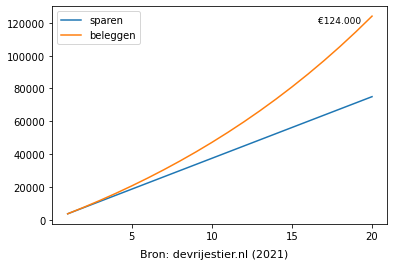

In [24]:
x = df.tijd
y1 = df.sparen
y2 = df.beleggen

plt.xticks(0 + np.arange(0, len(x)+1, 5))
plt.plot(x, y1, label='sparen')
plt.plot(x, y2, label='beleggen')
plt.legend()
txt="Bron: devrijestier.nl (2021)"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=11)
plt.figtext(0.74, 0.82, '€124.000', fontsize=9)
plt.savefig('myimage.png', format='png', dpi=600)
plt.show()

# 6.2 Salarisverhoging

In [29]:
leeftijd = []
for tijd in df.tijd:
    jaar = tijd + 24
    leeftijd.append(jaar)

In [39]:
df2 = pd.DataFrame(data=leeftijd, columns=['leeftijd'])

In [42]:
geen = []
geen.append(start*spaarperc)
for num in range(0, max_jaren-1):
    port_geen = start*spaarperc + geen[num]*rendement
    geen.append(port_geen)
df2['geen'] = geen

,leeftijd,geen
15,40,88715.594129
16,41,96901.373835
17,42,105496.442527
18,43,114521.264653
19,44,123997.327886


In [45]:
df2['geen_verhoging'] = start

In [46]:
df2.tail()

,leeftijd,geen,geen_verhoging
15,40,88715.594129,25000
16,41,96901.373835,25000
17,42,105496.442527,25000
18,43,114521.264653,25000
19,44,123997.327886,25000


In [57]:
wel_verhoging = []
for x in range(1,6):
    wel_verhoging.append(start)
for x in range(6,21):
    wel_verhoging.append(start*1.2)
df2['wel_verhoging'] = wel_verhoging
df2.tail()

,leeftijd,geen,geen_verhoging,wel_verhoging
15,40,88715.594129,25000,30000.0
16,41,96901.373835,25000,30000.0
17,42,105496.442527,25000,30000.0
18,43,114521.264653,25000,30000.0
19,44,123997.327886,25000,30000.0


In [59]:
vroeg5 = []
vroeg5.append(start*spaarperc)
for num in range(0, max_jaren-1):
    port_vroeg5 = wel_verhoging[num]*spaarperc + vroeg5[num]*rendement
    vroeg5.append(port_vroeg5)
df2['vroeg5'] = vroeg5
df2.tail()

,leeftijd,geen,geen_verhoging,wel_verhoging,vroeg5
15,40,88715.594129,25000,30000.0,98149.013530
16,41,96901.373835,25000,30000.0,107556.464207
17,42,105496.442527,25000,30000.0,117434.287417
18,43,114521.264653,25000,30000.0,127806.001788
19,44,123997.327886,25000,30000.0,138696.301877


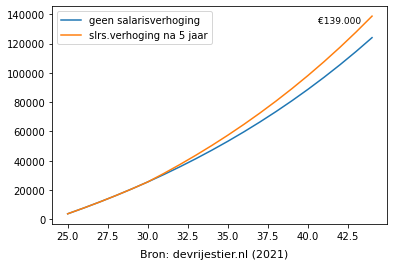

In [82]:
x2 = df2.leeftijd
z1 = df2.geen
z2 = df2.vroeg5

plt.plot(x2, z1, label='geen salarisverhoging')
plt.plot(x2, z2, label='slrs.verhoging na 5 jaar')
plt.legend()
txt="Bron: devrijestier.nl (2021)"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=11)
plt.figtext(0.74, 0.82, '€139.000', fontsize=9)
plt.savefig('salarisverhoging.png', format='png', dpi=600)
plt.show()

In [70]:
verschil = df2.vroeg5.iloc[19] - df2.geen.iloc[19]
verschil

14698.973991591003

# De eerste 100k is het moeilijkst

In [72]:
tijd2 = []
for num in range(1,41):
    tijd2.append(num)
len(tijd2)

In [79]:
sparen2 = []
for num in range(1, 41):
    spaargeld2 = start*spaarperc*num
    sparen2.append(spaargeld2)
len(sparen2)

40

In [80]:
beleggen2 = []
beleggen2.append(start*spaarperc)
for num in range(0, 39):
    portf2 = start*spaarperc + beleggen2[num]*rendement
    beleggen2.append(portf2)
len(beleggen2)

40

In [85]:
data2 = {'tijd': tijd2, 'sparen':sparen2, 'beleggen': beleggen2}
df3 = pd.DataFrame(data=data2)
df3

,tijd,sparen,beleggen
0,1,3750.0,3750.000000
1,2,7500.0,7687.500000
2,3,11250.0,11821.875000
3,4,15000.0,16162.968750
4,5,18750.0,20721.117188
5,6,22500.0,25507.173047
6,7,26250.0,30532.531699
7,8,30000.0,35809.158284
8,9,33750.0,41349.616198
9,10,37500.0,47167.097008


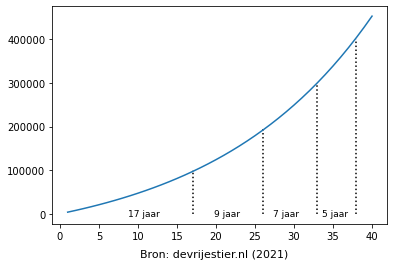

In [101]:
tijd = df3.tijd
bedrag = df3.beleggen

plt.xticks(0 + np.arange(0, len(tijd)+1, 5))
plt.plot(tijd, bedrag, label='beleggen')
plt.figtext(0.5, 0.01, "Bron: devrijestier.nl (2021)", wrap=True, horizontalalignment='center', fontsize=11)
plt.vlines(17, 0, 100000, linestyles ="dotted", colors ="k")
plt.figtext(0.3, 0.15, '17 jaar', fontsize=9)
plt.vlines(26, 0, 200000, linestyles ="dotted", colors ="k")
plt.figtext(0.5, 0.15, '9 jaar', fontsize=9)
plt.vlines(33, 0, 300000, linestyles ="dotted", colors ="k")
plt.figtext(0.635, 0.15, '7 jaar', fontsize=9)
plt.vlines(38, 0, 400000, linestyles ="dotted", colors ="k")
plt.figtext(0.75, 0.15, '5 jaar', fontsize=9)
plt.savefig('6. jaren 100k.png', format='png', dpi=600)
plt.show()